In [1]:
import numpy as np               
import scipy  as sp              
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn import cluster, datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# k-平均法

In [2]:
d = datasets.load_wine()             # wineデータ読み込み
xs = scale(d.data)                   # データをスケーリング
# k=3でk平均法を実行：10種類の初期値を試す．
km = cluster.KMeans(n_clusters=3, n_init=10)
km.fit(xs)                           # フィッティング
cl = km.labels_                      # データ点が属するクラスタ

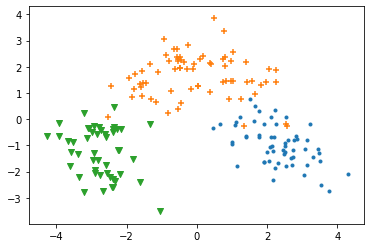

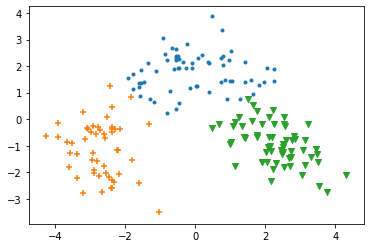

In [3]:
pc = PCA(n_components=2)               # データを主成分分析
pc.fit(xs)
pxs = pc.transform(xs)                 # 主成分スコア
# 品種による分類でプロット
mk=['.','+','v']
for i in np.arange(3):
    idx=(d.target==i)
    plt.scatter(pxs[idx,0],pxs[idx,1],marker=mk[i])
plt.show()
# k-平均法による分類でプロット
for i in np.arange(3):
    idx=(cl==i)
    plt.scatter(pxs[idx,0],pxs[idx,1],marker=mk[i])
plt.show()

# スペクトラル・クラスタリング

In [4]:
from common import mlbench as ml # mlbench 読込み

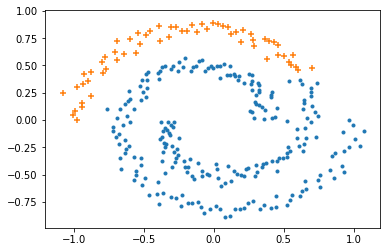

In [5]:
# データ生成  
x,y = ml.spirals(300, cycles=1, sd=0.05)  
# スペクトラル・クラスタリングを適用 
sc = cluster.SpectralClustering(n_clusters=2, gamma=300, n_init=100)
sc.fit(x)  
cl = sc.labels_       # データ点のクラスタリング
mk=['.','+','v']      # プロット
for i in [0,1]:
    idx=(cl==i)
    plt.scatter(x[idx,0],x[idx,1],marker=mk[i])
plt.show()

# 局所性保存射影と多次元尺度構成法

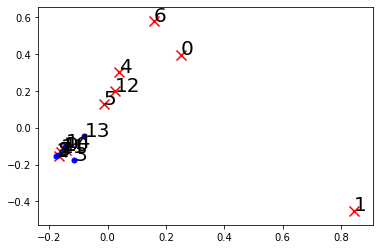

In [6]:
from sklearn.manifold import MDS             # MDSを使う
data = pd.read_csv('data/voting.csv').values      # votingデータを使う
S, pidx = data[:,:15], data[:,15]               # 類似度
mk = ['x','.']; col=['red','blue']           # プロット設定
# 局所性保存射影
W = np.exp(-S/np.median(S))            # 重みに変換(15次行列)
L = np.diag(np.sum(W,1)) - W           # グラフ・ラプラシアン
la, l = sp.linalg.eigh(L)              
px = l[:,1]; py = l[:,2]               # 小さい固有値に対応する固有ベクトル
for i in [0,1]:                        # 局所性保存射影の結果をプロット
    plt.scatter(px[pidx==i],py[pidx==i],c=col[i],marker=mk[i],s=100)
for i,(x,y) in enumerate(zip(px,py)):  # プロットの各点に番号を付与
    plt.annotate(str(i),(x,y),fontsize=20) 
plt.show()

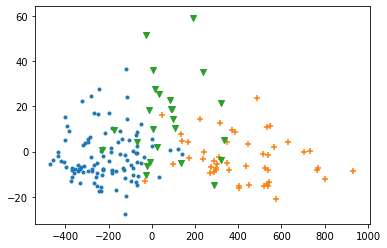

In [7]:
from sklearn.mixture import GaussianMixture
d = datasets.load_wine()       # wineデータ読み込み
x, y = d.data, d.target            # データの特徴量とラベル
ncl = 3                        # コンポーネント数３の混合正規分布
mg = GaussianMixture(ncl).fit(x)
cl = mg.predict(x)
pc = PCA(n_components=2)       # データの主成分分析
pc.fit(x)                      
px = pc.transform(x)           # 主成分スコア
mk=['.','+','v']               # クラスタリングの結果をプロット
for i in np.arange(ncl):
    j=(cl==i)
    plt.scatter(px[j,0],px[j,1],marker=mk[i])
plt.show()

k= 20
k= 40
k= 60
k= 80
k= 100


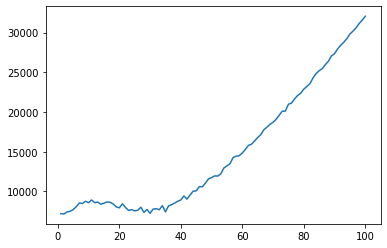

In [8]:
bics = np.array([])
nc = np.arange(1,101)  # クラスタ数：1から100
for k in nc:
    if k%20==0: print('k=',k)
    bics = np.r_[bics, GaussianMixture(k,n_init=10).fit(x).bic(x)]
bic_optk = nc[np.argmin(bics)]
bic_optk               # BICが最も小さくなるクラスタ数
plt.plot(nc,bics)      # クラスタ数に対するBICの値をプロット
plt.show() 

In [9]:
nc[np.argmin(bics)]     # BICが最小になるクラスタ数

2